## Задание №2. Проверка статистических гипотез 

Веберите любые данные из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и проверьте для них различные статистические гипотезы в соответствии со следующей схемой. Комментарии к каждому разделу обязательны. Возможно применения разных наборов данных для проверки разных гипотез.

# Критерий согласия Пирсона ( $\chi^2$)¶


In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from scipy import stats
from pandas import set_option
import scipy
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('ONE PIECE.csv', sep = ',')
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

       Unnamed: 0  season  episode     start  average_rating
count     958.000   958.0  958.000   958.000         958.000
mean      478.500     1.0  479.500  2010.232           7.797
std       276.695     0.0  276.695     6.050           0.590
min         0.000     1.0    1.000  1999.000           5.600
25%       239.250     1.0  240.250  2005.000           7.500
50%       478.500     1.0  479.500  2010.000           7.800
75%       717.750     1.0  718.750  2015.000           8.200
max       957.000     1.0  958.000  2021.000           9.600


In [3]:
data_rating = data['average_rating']
data_tet = [0 for i in range(13)]
for i in data_rating:
    number = 5.6
    for j in range(13):
        if  number  <= i < number + 0.3 :
            data_tet[j] +=1
            break
        number+=0.3

In [4]:
data_tet

[2, 7, 13, 29, 38, 85, 179, 243, 167, 111, 49, 30, 4]

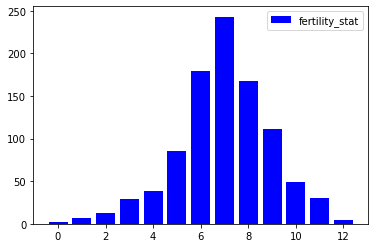

In [5]:
pylab.bar(range(len(data_tet)), data_tet, color = 'b', label = 'fertility_stat')
pylab.legend()

In [6]:
l = np.mean(data_rating);l

7.796555323590819

In [7]:
observed_frequences = np.array(data_tet)
observed_frequences

array([  2,   7,  13,  29,  38,  85, 179, 243, 167, 111,  49,  30,   4])

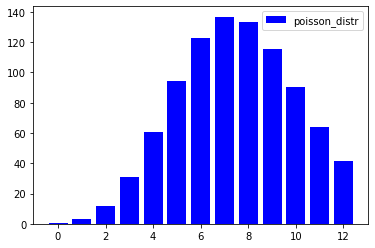

In [8]:
data_prom = [round(x) for x in data_rating]
expected_frequences = [len(data_rating)*stats.poisson.pmf(x, l) 
                           for x in np.arange(0,13)]
pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

In [9]:
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=208.40104641171234, pvalue=1.3391383047583843e-38)

## Проверка гипотезы о независимости метрических признаков (корреляция Пирсона)

In [10]:
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
data = read_csv(filename, names=names)
peek = data.head(20);peek

,дисперсия,асимметрия,эксцесс,энтропия,класс
0,3.622,8.666,-2.807,-0.447,0
1,4.546,8.167,-2.459,-1.462,0
2,3.866,-2.638,1.924,0.106,0
3,3.457,9.523,-4.011,-3.594,0
4,0.329,-4.455,4.572,-0.989,0
5,4.368,9.672,-3.961,-3.163,0
6,3.591,3.013,0.729,0.564,0
7,2.092,-6.810,8.464,-0.602,0
8,3.203,5.759,-0.753,-0.613,0
9,1.536,9.177,-2.272,-0.735,0


## Проверка гипотезы о независимости ранговых признаков (корреляции Спирмена, Кендалла)

In [11]:
#кендал

In [12]:
dict_kendal = {}
for i in names[:-1]:
    for j in names[:-1]:
        if not f"{i} - {j}" in dict_kendal.keys() and  not f"{j} - {i}" in dict_kendal.keys() and i != j : 
            dict_kendal[f'{i} - {j}'] = scipy.stats.kendalltau(data[i],data[j])

In [13]:
dict_kendal

{'дисперсия - асимметрия': KendalltauResult(correlation=0.18055421918610118, pvalue=1.2720784640615347e-23),
 'дисперсия - эксцесс': KendalltauResult(correlation=-0.22645475996517603, pvalue=3.299764406520118e-36),
 'дисперсия - энтропия': KendalltauResult(correlation=0.16735409538613258, pvalue=1.619204142965763e-20),
 'асимметрия - эксцесс': KendalltauResult(correlation=-0.5524511480070493, pvalue=2.566833123691207e-206),
 'асимметрия - энтропия': KendalltauResult(correlation=-0.390602301859174, pvalue=3.967395430852926e-104),
 'эксцесс - энтропия': KendalltauResult(correlation=0.2836363837924914, pvalue=8.625081450863432e-56)}

In [14]:
dict_pirson = {}
for i in names[:-1]:
    for j in names[:-1]:
        if not f"{i} - {j}" in dict_kendal.keys() and  not f"{j} - {i}" in dict_pirson.keys() and i != j : 
            dict_pirson[f'{i} - {j}'] = scipy.stats.pearsonr(data[i],data[j])

In [15]:
dict_pirson

{'асимметрия - дисперсия': (0.26402552997043616, 2.5790864732246356e-23),
 'эксцесс - дисперсия': (-0.38084997204625237, 1.353440464463466e-48),
 'эксцесс - асимметрия': (-0.7868952243065801, 1.6277753903624563e-289),
 'энтропия - дисперсия': (0.2768166960053636, 1.4817699814651292e-25),
 'энтропия - асимметрия': (-0.526320842543715, 1.3048279829588256e-98),
 'энтропия - эксцесс': (0.3188408876874457, 8.594883585820842e-34)}

## Проверка гипотезы о независимости номинативных признаков ($\chi^2$)

## Проверка гипотезы о равенстве дисперсий (критерий Флингера-Килина, критерий Ливена, F-критерий)

## Критерий согласия Стьюдента (одновыборочный)

In [16]:
stats.ttest_1samp(data_rating, 7.7)

Ttest_1sampResult(statistic=5.068159587645532, pvalue=4.820441414841524e-07)

## Проверка гипотезы о равенстве средних значений для независимых выборок (двухвыборочный критерий Стьюдента для независимых выборок)

In [17]:
#составляем список исходя из изначального массива 
#1-  дисперсия у настоящих купюр
#2 - дисперсия у ненастоящий купюр

In [18]:
true_money = data.loc[(data["класс"] == 0)]['дисперсия']
false_money = data.loc[(data["класс"] == 1)]['дисперсия']

In [19]:
scipy.stats.ttest_ind(true_money,false_money)

Ttest_indResult(statistic=38.943891307966624, pvalue=5.740965365479549e-224)

## Проверка гипотезы о равенстве средних значений для зависимых выборок (двухвыборочный критерий Стьюдента для зависимых выборок)

## Проверка гипотезы о равенстве медиан для независимых выборок (ранговый критерий Манна-Уитни, перестановочный критерий)

In [20]:
true_money = data.loc[(data["класс"] == 0)]['дисперсия']
false_money = data.loc[(data["класс"] == 1)]['дисперсия']
scipy.stats.mannwhitneyu(true_money,false_money)

MannwhitneyuResult(statistic=33777.5, pvalue=1.1786904483003944e-163)

## Проверка гипотезы о равенстве медиан для зависимых выборок (критерий знаковых рангов Уилкоксона, критерий знаков, перестановочный критерий)